# The El Nino Southern Oscillation: physical processes and impacts of the interannual variability 
    

## i.) **PROJECT DESCRIBTION**

This is a lecture about ENSO. It will explain its basic mechanisms, what gave it its name and what are the main indices describing it. 

We also describe its the effects on Pacific (and/or) global climate in a independend way at the end of this project.

In [1]:
# Import the tools we are going to need today:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import pandas as pd  # new package! this is the package at the base of xarray
import io, requests
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.gridspec as gridspec

# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

# ignore filter warnings: 
import warnings
warnings.filterwarnings('ignore')

# Some defaults:
np.set_printoptions(threshold=20)  # avoid to print very large arrays on screen


## ii.) LOAD SOME DATA

In [2]:
# u, v, slp
uvslp = xr.open_dataset('C:/Users/david/OneDrive - uibk.ac.at/MA/VU Physik des Klimasystems/LectureNotebooks/Group project/ERA5_LowRes_Monthly_uvslp.nc') 
uvslp


<xarray.Dataset>
Dimensions:    (longitude: 480, latitude: 241, time: 480)
Coordinates:
  * longitude  (longitude) float32 -179.6 -178.9 -178.1 ... 178.1 178.9 179.6
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-24 19:42:05 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...

## iii.) TIME SELECTION OF DATA

In [3]:
# List of moderates to very strong events according to https://ggweather.com/enso/oni.htm based on ONI Index
strong_nino_yrs = [1983, 1998, 2016, 1988, 1992]
strong_nina_yrs = [1989, 1999, 2000, 2008, 2011]
mod_nino_yrs = [1987, 1995, 2003, 2010]
mod_nina_yrs = [1996, 2012]
weak_nino_yrs = [1980, 2005, 2007, 2015]
weak_nina_yrs = [1984, 1985, 2001, 2006, 2009, 2017, 2018]

nino_yrs = [1983, 1998, 2016, 1988, 1992,  1987, 1995, 2003, 2010]
nina_yrs = [1989, 1999, 2000, 2008, 2011, 1996, 2012]

# now I'll compute the neutral years
neutral_yrs = [yr for yr in np.arange(1980, 2019) if yr not in nino_yrs and yr not in nina_yrs]

# Content Overview 

### 1. Introduction to the topic
#### Description of the Walker Circulation
### 2. ENSO Evolution
#### Southern oscillation and its index
### 3. ENSO Theory
#### Box 4-5 ENSO Behavior and Coupled Ocean-Atmosphere Models
### 4. Monitoring ENSO evolution
### 5. Indices used to Monitor ENSO Evolution
### 6. Comparing El Niño and La Niña atmospheric and oceanic anomalies
### 7. Climate Impacts Related to ENSO
### 8. Forecasting ENSO


### 1. Introduction to the topic

El Niño and the Southern Oscillation, also known as ENSO is a periodic fluctuation in sea surface temperature (El Niño) and the air pressure of the overlying atmosphere (Southern Oscillation) across the equatorial Pacific Ocean. El Niño is so termed because it generally reaches full strength toward the end of the year, and early Christian inhabitants of western equatorial South America equated the warm water current and the resulting impacts with their holiday celebrating the birth of Jesus Christ (known as El Niño in Spanish).

### 2. ENSO Evolution
#### Southern oscillation and its index

* The Southern Oscillation is the atmospheric component of ENSO, involving a seesawing of surface pressure across the Equatorial Pacific and occurring in concert with El Niño. It is not certain whether El Niño causes the Southern Oscillation or vice–versa but an observation of an anomaly of one heralds the arrival of the other. Alternatively, from a coupled perspective, they both rely on and modulate each other. 

* The oscillation was noted by Sir Gilbert Walker during his quest to forecast the monsoon. The SOI is a proxy for the strength of trade winds, as pressure differences determine wind speed. 

* The Southern Oscillation Index (SOI) is a standardized index based on difference in the observed sea level pressure (SLP) between Darwin, Australia and Tahiti, French Polynesia. So it is a measure of the large-scale fluctuations in air pressure occurring between the western and eastern tropical Pacific (i.e., the state of the Southern Oscillation) during El Niño and La Niña episodes.

It can be calculated as

$$ SOI = \frac{Standardized Tahiti - Standardized Darwin}{MSD} $$
where the variables are the following: 

A.1 $Standardized Tahiti = (Actual Tahiti SLP - Mean Tahiti SLP)$

A.2. $Standard Deviation Tahiti = \sqrt(\frac{\sum(actual Tahiti SLP - mean Tahiti SLP)^2}{N})$

B.1 $Standardized Darwin = (Actual Darwin SLP - Mean Darwin SLP)$

B.2 $Standard Deviation Darwin = \sqrt(\frac{\sum(actual Darwin SLP - mean Darwin SLP)^2}{N})$



$$ MSD (Monthly Standard Deviation) = \sqrt(\frac{\sum(Standardized Tahiti - Standardized Darwin)^2}{N}) $$
where N = number of months

Smoothed time series of SOI corresponds well with changes in ocean temperatures across the eastern tropical Pacific. 
The correspondence between pressure differences are the following: 
1. negative phase of SOI:
+ below-normal air pressure at Tahiti and above-normal air pressure at Darwin;
+ low pressure differences = low SOI at El Niño;
+ abnormally warm ocean waters across the eastern tropical Pacific;
2. positive phase of SOI:
+ above-normal air pressure at Tahiti and below-normal air pressure at Darwin;
+ high pressure differences = high SOI at La Niña; 
+ bnormally cold ocean waters across the eastern tropical Pacific; 

##### Seasonal averages and time series
1. compute the seasonal averages of the sea surface pressure

In [4]:
# compute monthly average:
slp_ma = uvslp.msl.load().groupby('time.month').mean(dim='time')
# compute seasonal averages
slp_sa = uvslp.msl.load().groupby('time.season').mean(dim='time')

# This uses a series of tricks to come to the goal
slp_djf = uvslp.msl.load().where(uvslp['time.season'] == 'DJF')
slp_djf = slp_djf.rolling(min_periods=3, center=True, time=3).mean()
slp_djf = slp_djf.groupby('time.year').mean('time')
slp_djf_mean = slp_djf.sel().mean(dim='year')
slp_djf_mean

<xarray.DataArray 'msl' (latitude: 241, longitude: 480)>
array([[101459.79620726, 101459.79620726, 101459.79620726, ...,
        101459.79620726, 101459.79620726, 101459.79620726],
       [101514.39316239, 101514.52457265, 101514.62740385, ...,
        101514.06143162, 101514.13221154, 101514.20699786],
       [101568.87980769, 101569.04647436, 101569.26388889, ...,
        101568.43269231, 101568.51949786, 101568.70860043],
       ...,
       [100212.35122863, 100215.16025641, 100214.91880342, ...,
        100206.75      , 100207.03311966, 100209.64770299],
       [100438.18776709, 100440.05128205, 100441.99278846, ...,
        100435.41720085, 100436.05876068, 100436.79220085],
       [100553.59188034, 100553.59188034, 100553.59188034, ...,
        100553.59188034, 100553.59188034, 100553.59188034]])
Coordinates:
  * longitude  (longitude) float32 -179.6 -178.9 -178.1 ... 178.1 178.9 179.6
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0

Text(0.5, 1.0, 'mean sea level pressure during DJF from 1980 to 2018')

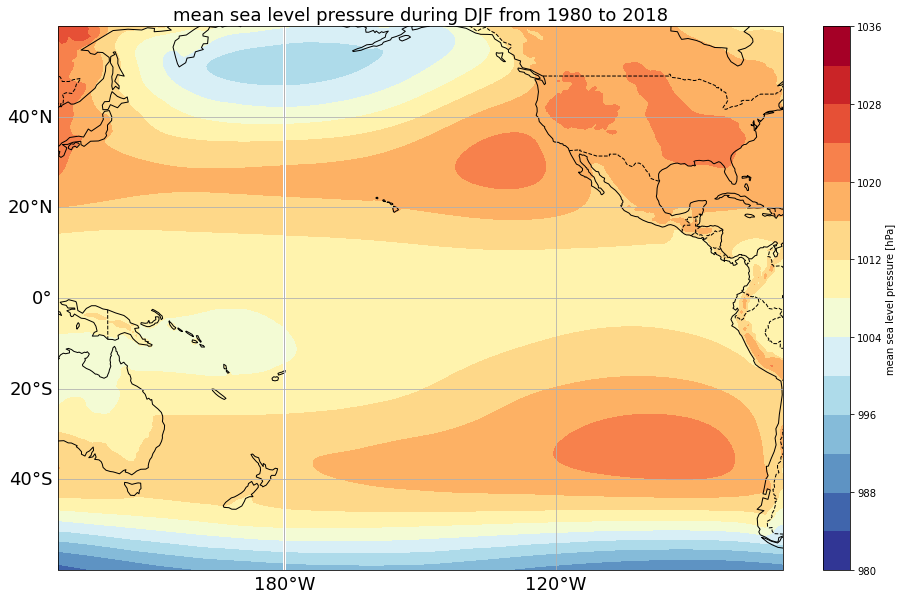

In [5]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,10),subplot_kw={'projection': ccrs.PlateCarree(central_longitude=210)})
slp_djf_mean = slp_djf_mean / 100
slp_djf_mean.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='RdYlBu_r',levels=18,
                                cbar_kwargs={'label':'mean sea level pressure [hPa]','fraction': 0.04, 'pad': 0.04})
ax.coastlines(color='black');
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
xl.xformatter = LONGITUDE_FORMATTER
xl.yformatter = LATITUDE_FORMATTER
xl.xlabel_style = {'size': 18, 'color': 'k'}
xl.ylabel_style = {'size': 18, 'color': 'k'}
ax.add_feature(cartopy.feature.BORDERS, linestyle='--')
ax.set_extent([280, 440, 60, -60], crs=ccrs.PlateCarree(central_longitude=210))
ax.set_title('mean sea level pressure during DJF from 1980 to 2018'.format(), fontsize = 18)

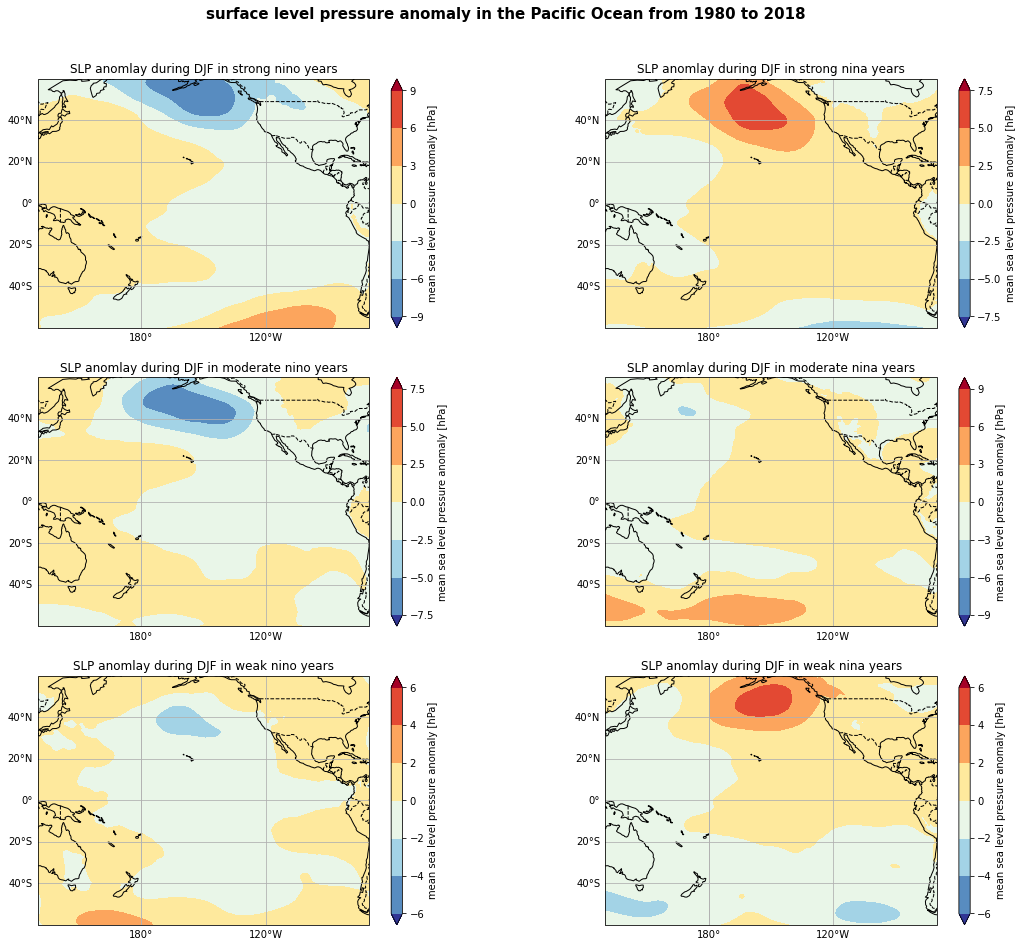

In [6]:
# plot average sea surf pressure over all years (1980 - 2018) in DJF season: 

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,10),subplot_kw={'projection': ccrs.PlateCarree(central_longitude=210)})
#levels = np.arange(980,1040,2)
enso = ['strong nino years', 'strong nina years', 'moderate nino years',
        'moderate nina years', 'weak nino years', 'weak nina years']
nino = [strong_nino_yrs, strong_nina_yrs, mod_nino_yrs, mod_nina_yrs, weak_nino_yrs, weak_nina_yrs]

i = 0
for x, y in ([0,0], [0,1], [1,0], [1,1], [2,0],[2,1]):
    ax = axes[x,y]
    slp = slp_djf.sel(year=nino[i]).mean(dim='year')
    slp_anom = (slp - slp_djf_mean*100)/100
    slp_anom.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='RdYlBu_r', #levels=levels,
                  extend='both', cbar_kwargs={'label':'mean sea level pressure anomaly [hPa]'})
    ax.coastlines(color='black');
    xl = ax.gridlines(draw_labels=True);
    xl.xlabels_top = False
    xl.ylabels_right = False
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--')
    ax.set_extent([280, 440, 60, -60], crs=ccrs.PlateCarree(central_longitude=210))
    ax.set_title('SLP anomlay during DJF in {}'.format(enso[i]))

    i += 1

plt.suptitle('surface level pressure anomaly in the Pacific Ocean from 1980 to 2018',fontsize=15, fontweight='bold', y=1.40)
plt.subplots_adjust(top=1.3, wspace = 0.3);

Text(0.5, 1.25, 'Average surface level pressure anomaly over Pacific ocean from 1980 to 2018')

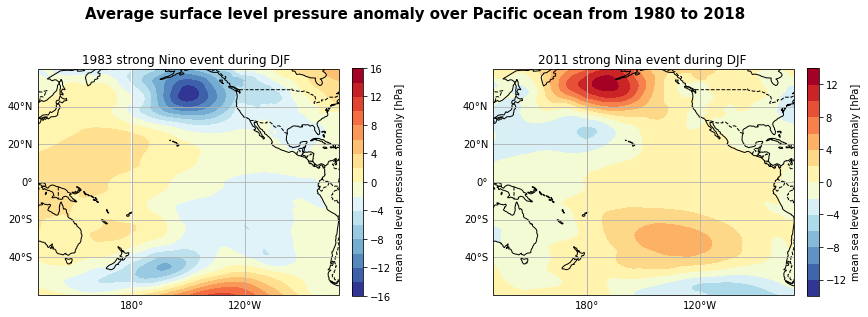

In [7]:
# plot the difference between nina and nino average sea surf pressure; 
strong_nino = [1983]
strong_nina = [2011]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5),subplot_kw={'projection': ccrs.PlateCarree(central_longitude=210)})
#levels = np.arange(980,1040,2)
enso_diff = ['1983 strong Nino', '2011 strong Nina']
nino_diff = [strong_nino, strong_nina]


i = 0
for x in (0,1):
    ax = axes[x]
    slp_nino = slp_djf.sel(year=nino_diff[i]).mean(dim='year')
    slp_diff = (slp_nino - slp_djf_mean*100) / 100
    slp_diff.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='RdYlBu_r', levels=18,
                           cbar_kwargs={'label':'mean sea level pressure anomaly [hPa]','fraction': 0.035, 'pad': 0.04})
    ax.coastlines(color='black');
    xl = ax.gridlines(draw_labels=True);
    xl.xlabels_top = False
    xl.ylabels_right = False
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--')
    ax.set_extent([280, 440, 60, -60], crs=ccrs.PlateCarree(central_longitude=210))
    ax.set_title('{} event during DJF '.format(enso_diff[i]))
    i += 1

plt.subplots_adjust(top=1.4, wspace = 0.4);
plt.suptitle('Average surface level pressure anomaly over Pacific ocean from 1980 to 2018',fontsize=15, fontweight='bold', y=1.25)

### SOI Index


In [8]:
# This just reads the data from an url
# Sea Level Pressure  (SLP) data from http://www.cpc.ncep.noaa.gov/data/indices/
import itertools as it

darwin = pd.read_csv('DarwinSeaLevelPressure_stand.csv')
#darwin = darwin.T
#darwin = darwin.stack()
#darwin = darwin.transpose()
#darwin.to_csv('DarwinSeaLevelPressure_stand.csv')
time = pd.to_datetime(darwin.YEAR.astype(str) + '-' + darwin.MONTH.astype(str))
darwin = xr.DataArray(darwin.VALUE, dims='time', coords={'time':time})
#print(darwin)
# Apply a 3-month smoothing window
darwin = darwin.rolling(time=3, min_periods=3, center=True).mean()


tahiti = pd.read_csv('TahitiSeaLevelPressure_stand.csv')
#tahiti = tahiti.transpose()
#tahiti = tahiti.stack()
#tahiti.to_csv('TahitiSeaLevelPressure_stand.csv')
time = pd.to_datetime(tahiti.YEAR.astype(str) + '-' + tahiti.MONTH.astype(str))
tahiti = xr.DataArray(tahiti.VALUE, dims='time', coords={'time':time})

# Apply a 3-month smoothing window
tahiti = tahiti.rolling(time=3, min_periods=3, center=True).mean()


eastpac = pd.read_csv('repac_slpa.csv')
#eastpac = eastpac.transpose()
#eastpac = eastpac.stack()
#eastpac.to_csv('repac_slpa.csv')
time = pd.to_datetime(eastpac.YEAR.astype(str) + '-' + eastpac.MONTH.astype(str))
eastpac = xr.DataArray(eastpac.VALUE, dims='time', coords={'time':time})

# Apply a 3-month smoothing window
eastpac = eastpac.rolling(time=3, min_periods=3, center=True).mean()


indo = pd.read_csv('rindo_slpa.csv')
#indo = indo.transpose()
#indo = indo.stack()
#indo.to_csv('rindo_slpa.csv')
time = pd.to_datetime(indo.YEAR.astype(str) + '-' + indo.MONTH.astype(str))
indo = xr.DataArray(indo.VALUE, dims='time', coords={'time':time})

# Apply a 3-month smoothing window
indo = indo.rolling(time=3, min_periods=3, center=True).mean()


eqatsoi = pd.read_csv('reqsoi.csv')
#eqatsoi = eqatsoi.transpose()
#eqatsoi = eqatsoi.stack()
#eqatsoi.to_csv('reqsoi.csv')
time = pd.to_datetime(eqatsoi.YEAR.astype(str) + '-' + eqatsoi.MONTH.astype(str))
eqatsoi = xr.DataArray(eqatsoi.VALUE, dims='time', coords={'time':time})

# Apply a 3-month smoothing window
eqatsoi = eqatsoi.rolling(time=3, min_periods=3, center=True).mean()


RSOI = pd.read_csv('rsoi.csv')
#RSOI = RSOI.transpose()
#RSOI = RSOI.stack()
#RSOI.to_csv('rsoi.csv')
time = pd.to_datetime(RSOI.YEAR.astype(str) + '-' + RSOI.MONTH.astype(str))
RSOI = xr.DataArray(RSOI.VALUE, dims='time', coords={'time':time})

# Apply a 3-month smoothing window
RSOI = RSOI.rolling(time=3, min_periods=3, center=True).mean()


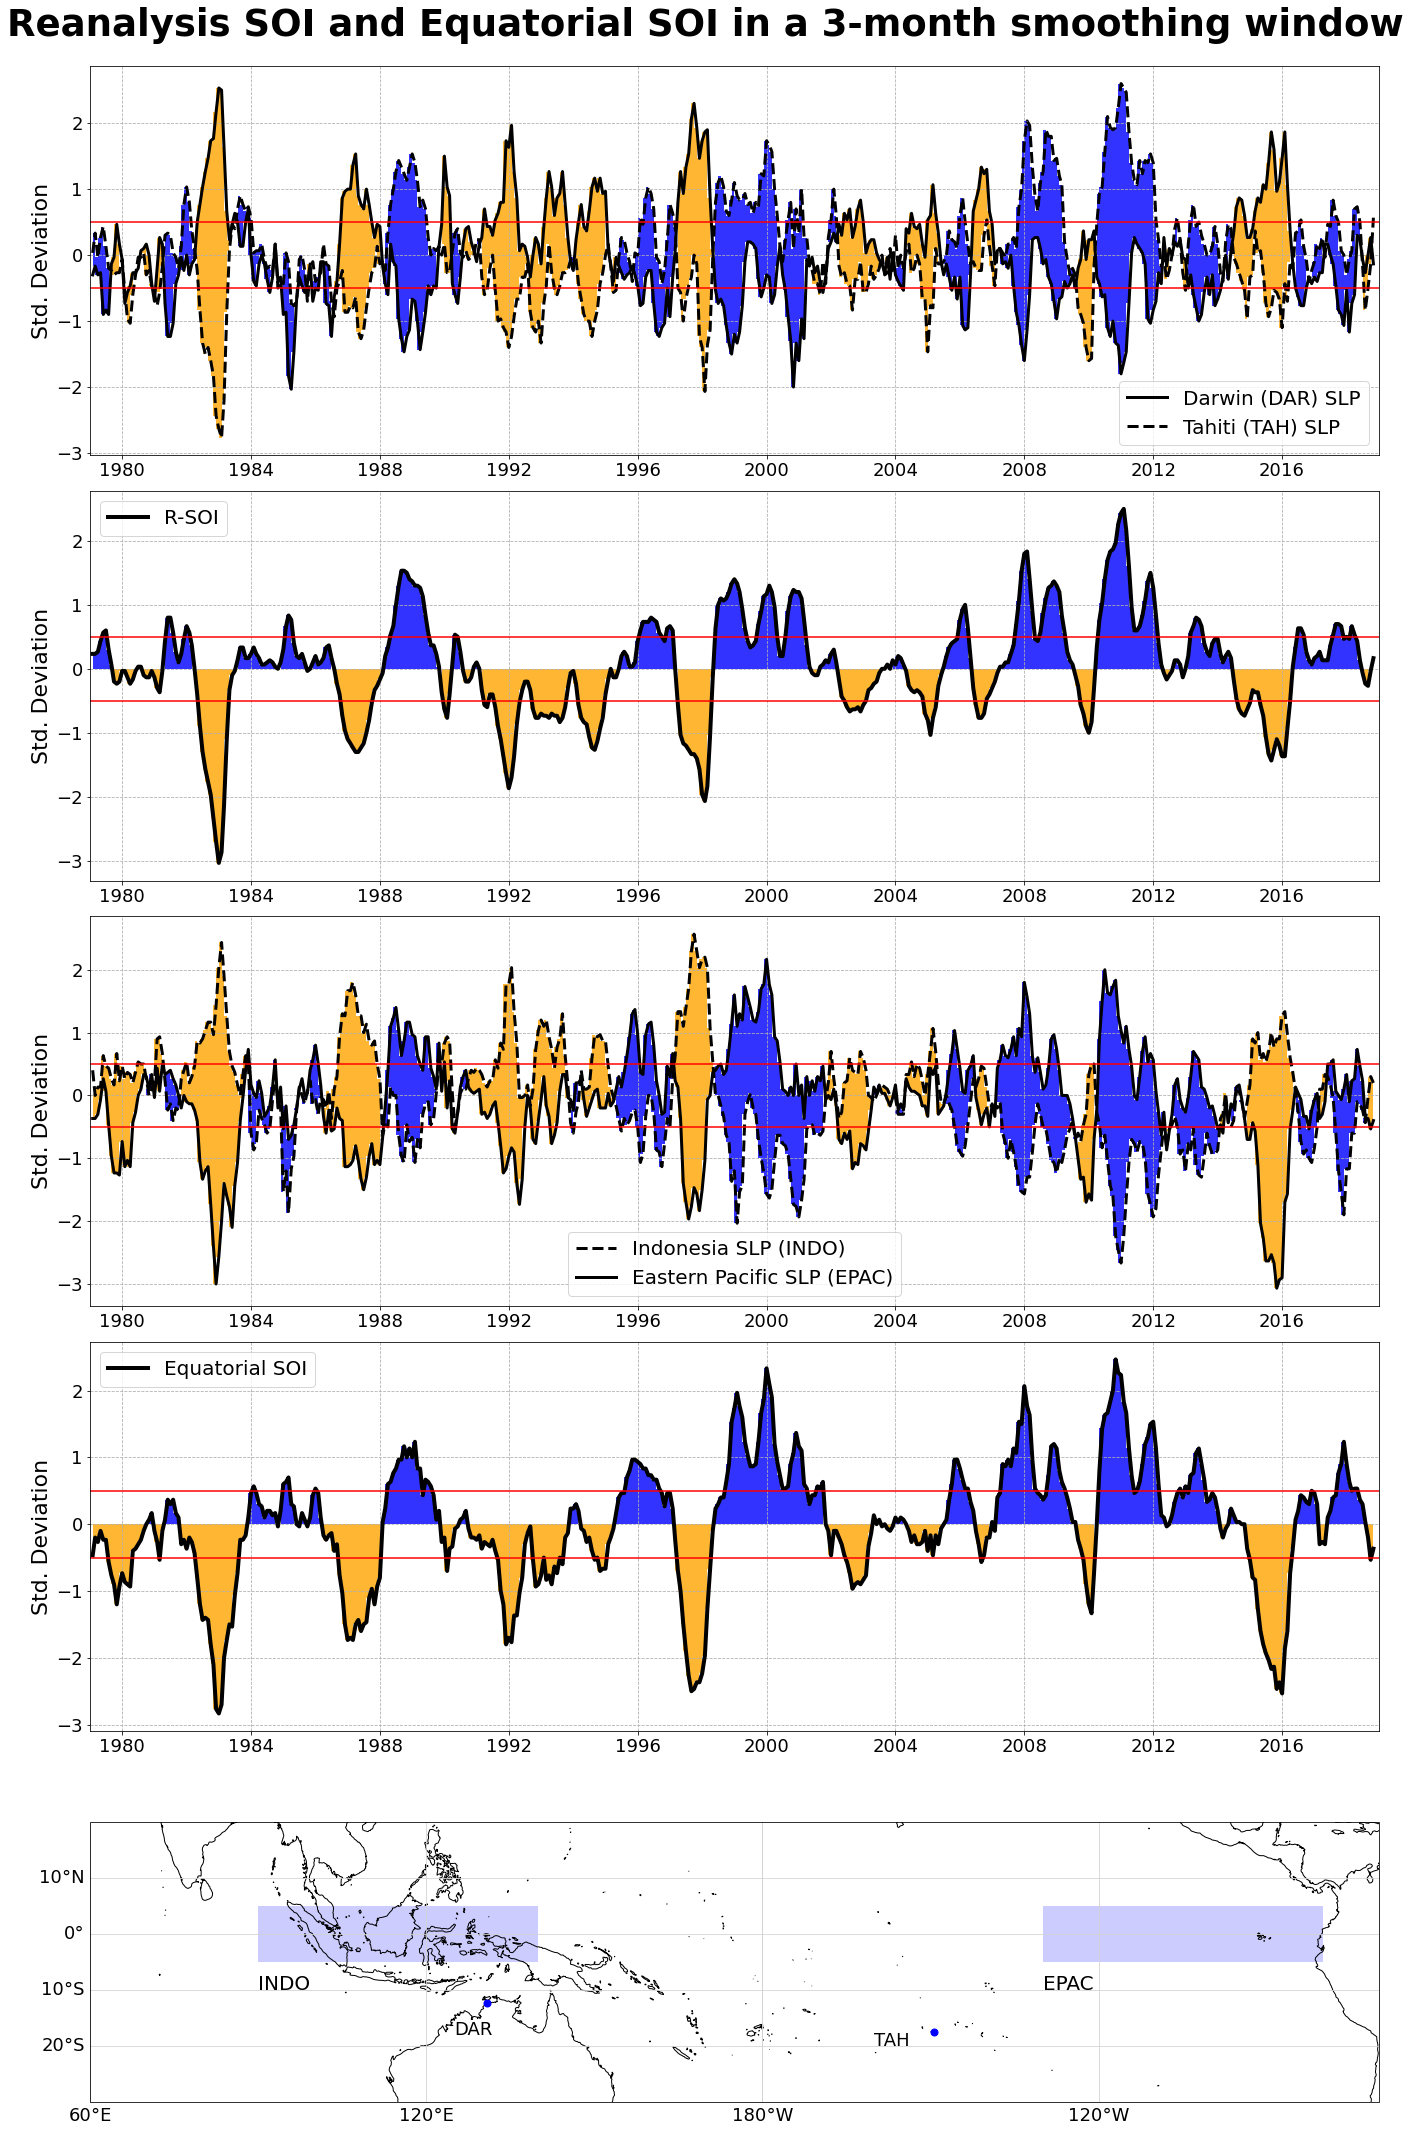

In [11]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patches as mpatches

plt.figure(figsize=[19,30])
plt.suptitle('Reanalysis SOI and Equatorial SOI in a 3-month smoothing window', fontsize=37, fontweight='bold', y = 1.00005)

# plot the subplots
# Plot1: 
plt.subplot(5,1,2)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.plot(time,RSOI, 'black', linewidth = 4);
plt.fill_between(time, RSOI, where = RSOI < 0, step="pre", facecolor = 'orange', alpha=0.8)
plt.fill_between(time, RSOI, where = RSOI > 0, step="pre", facecolor = 'blue', alpha=0.8)
plt.legend(["R-SOI"], loc="upper left", fontsize = 20)
plt.grid(linestyle='--')
plt.ylabel('Std. Deviation', fontsize = 22)
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = -0.5, color = 'r', linestyle = '-')
plt.xlim(['1979-01-01','2018-12-31'])


# plot2: 
plt.subplot(5,1,1)
plt.plot(time,darwin, 'black', linewidth = 3);
plt.plot(time,tahiti, '--k', linewidth = 3);
plt.fill_between(time, darwin, tahiti, where = darwin < tahiti, step="pre", facecolor = 'blue', alpha=0.8)
plt.fill_between(time, darwin, tahiti, where = darwin > tahiti, step="pre", facecolor = 'orange', alpha=0.8)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.legend(['Darwin (DAR) SLP','Tahiti (TAH) SLP'], loc = "best", fontsize = 20)
plt.grid(linestyle='--')
plt.ylabel('Std. Deviation', fontsize = 22)
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = -0.5, color = 'r', linestyle = '-')
plt.xlim(['1979-01-01','2018-12-31'])


# plot3: 
plt.subplot(5,1,4)
plt.plot(time,eqatsoi, 'k', linewidth = 4)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.fill_between(time, eqatsoi, where = eqatsoi < 0, step="pre", facecolor = 'orange', alpha=0.8)
plt.fill_between(time, eqatsoi, where = eqatsoi > 0, step="pre", facecolor = 'blue', alpha=0.8)
plt.legend(['Equatorial SOI'], loc="upper left", fontsize = 20)
plt.grid(linestyle='--')
plt.ylabel('Std. Deviation', fontsize = 22)
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = -0.5, color = 'r', linestyle = '-')
plt.xlim(['1979-01-01','2018-12-31'])


#plot4: 
plt.subplot(5,1,3)
plt.plot(time,indo,'--k', linewidth = 3);
plt.plot(time,eastpac, 'k', linewidth = 3);
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.fill_between(time, indo, eastpac, where = indo < eastpac, step="pre", facecolor = 'blue', alpha=0.8)
plt.fill_between(time, indo, eastpac, where = indo > eastpac, step="pre", facecolor = 'orange', alpha=0.8)
plt.legend(['Indonesia SLP (INDO)','Eastern Pacific SLP (EPAC)'], loc="best", fontsize = 20)
plt.grid(linestyle='--')
plt.ylabel('Std. Deviation', fontsize = 22)
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = -0.5, color = 'r', linestyle = '-')
plt.xlim(['1979-01-01','2018-12-31'])


# plot5: 
ax1 = plt.subplot(5,1,5,projection=ccrs.PlateCarree(central_longitude=180))
ax1.set_extent([-120, 110, 20, -30], crs=ccrs.PlateCarree(central_longitude=180))
ax1.coastlines(resolution='auto', color='k')
# mark a known place to help us geo-locate ourselves
ax1.plot(-149.4499, -17.63, 'bo', markersize=7, transform=ccrs.Geodetic())
ax1.text(-160, -20, 'TAH', transform=ccrs.Geodetic(), fontsize=18)
ax1.plot(130.844441, -12.438056, 'bo', markersize=7, transform=ccrs.Geodetic())
ax1.text(125, -18, 'DAR', transform=ccrs.Geodetic(), fontsize=18)
ax1.add_patch(mpatches.Rectangle(xy=[90, -5], width=50, height=10,facecolor='blue', alpha=0.2, transform=ccrs.PlateCarree()))
ax1.text(90, -10, 'INDO', transform=ccrs.Geodetic(), fontsize=20)
ax1.add_patch(mpatches.Rectangle(xy=[-130, -5], width=50, height=10,facecolor='blue', alpha=0.2, transform=ccrs.PlateCarree()))
ax1.text(-130, -10, 'EPAC', transform=ccrs.Geodetic(), fontsize=20)
g1 = ax1.gridlines(color='lightgrey', linestyle='-', draw_labels=True)
g1.xlabels_top = False
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabel_style = {'size': 18, 'color': 'k'}
g1.ylabel_style = {'size': 18, 'color': 'k'}


plt.tight_layout()
plt.show()



Panda's dataframes are one of the most widely used tool in the scientific python ecosystem. You'll get to know them better in next semester's glaciology lecture, but for now we are going to convert this to an xarray structure, which we know better:

**Q: plot the Nino 3.4 index. Add the +0.5 and -0.5 vertical lines. Can you identify (approximately) the various Niño and Niña events? See if it fits to the list of years published [here](https://www.esrl.noaa.gov/psd/enso/past_events.html).**

## Composites

In [59]:
ninos = pd.read_csv('SST-Ninos.csv',delim_whitespace = True)
time = pd.to_datetime(ninos.YR.astype(str) + '-' + ninos.MON.astype(str))
nino12 = xr.DataArray(ninos.ANOM12, dims='time', coords={'time':time})
nino3 = xr.DataArray(ninos.ANOM3, dims='time', coords={'time':time})
nino4 = xr.DataArray(ninos.ANOM4, dims='time', coords={'time':time})
nino34 = xr.DataArray(ninos.ANOM34, dims='time', coords={'time':time})
# Apply a 3-month smoothing window
nino12 = ninos12.rolling(time=3, min_periods=3, center=True).mean()
nino3 = ninos3.rolling(time=3, min_periods=3, center=True).mean()
nino4 = ninos4.rolling(time=3, min_periods=3, center=True).mean()
nino34 = ninos34.rolling(time=3, min_periods=3, center=True).mean()
print(nino12)
print(nino3)
print(nino4)
print(nino34)

<xarray.DataArray 'ANOM12' (time: 447)>
array([        nan,         nan, -0.82555556, ...,  0.5       ,
               nan,         nan])
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-03-01
<xarray.DataArray 'ANOM3' (time: 447)>
array([       nan,        nan, 0.09444444, ..., 0.71888889,        nan,
              nan])
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-03-01
<xarray.DataArray 'ANOM4' (time: 447)>
array([       nan,        nan, 0.26888889, ..., 0.82777778,        nan,
              nan])
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-03-01
<xarray.DataArray 'ANOM34' (time: 447)>
array([       nan,        nan, 0.13555556, ..., 0.75333333,        nan,
              nan])
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-03-01


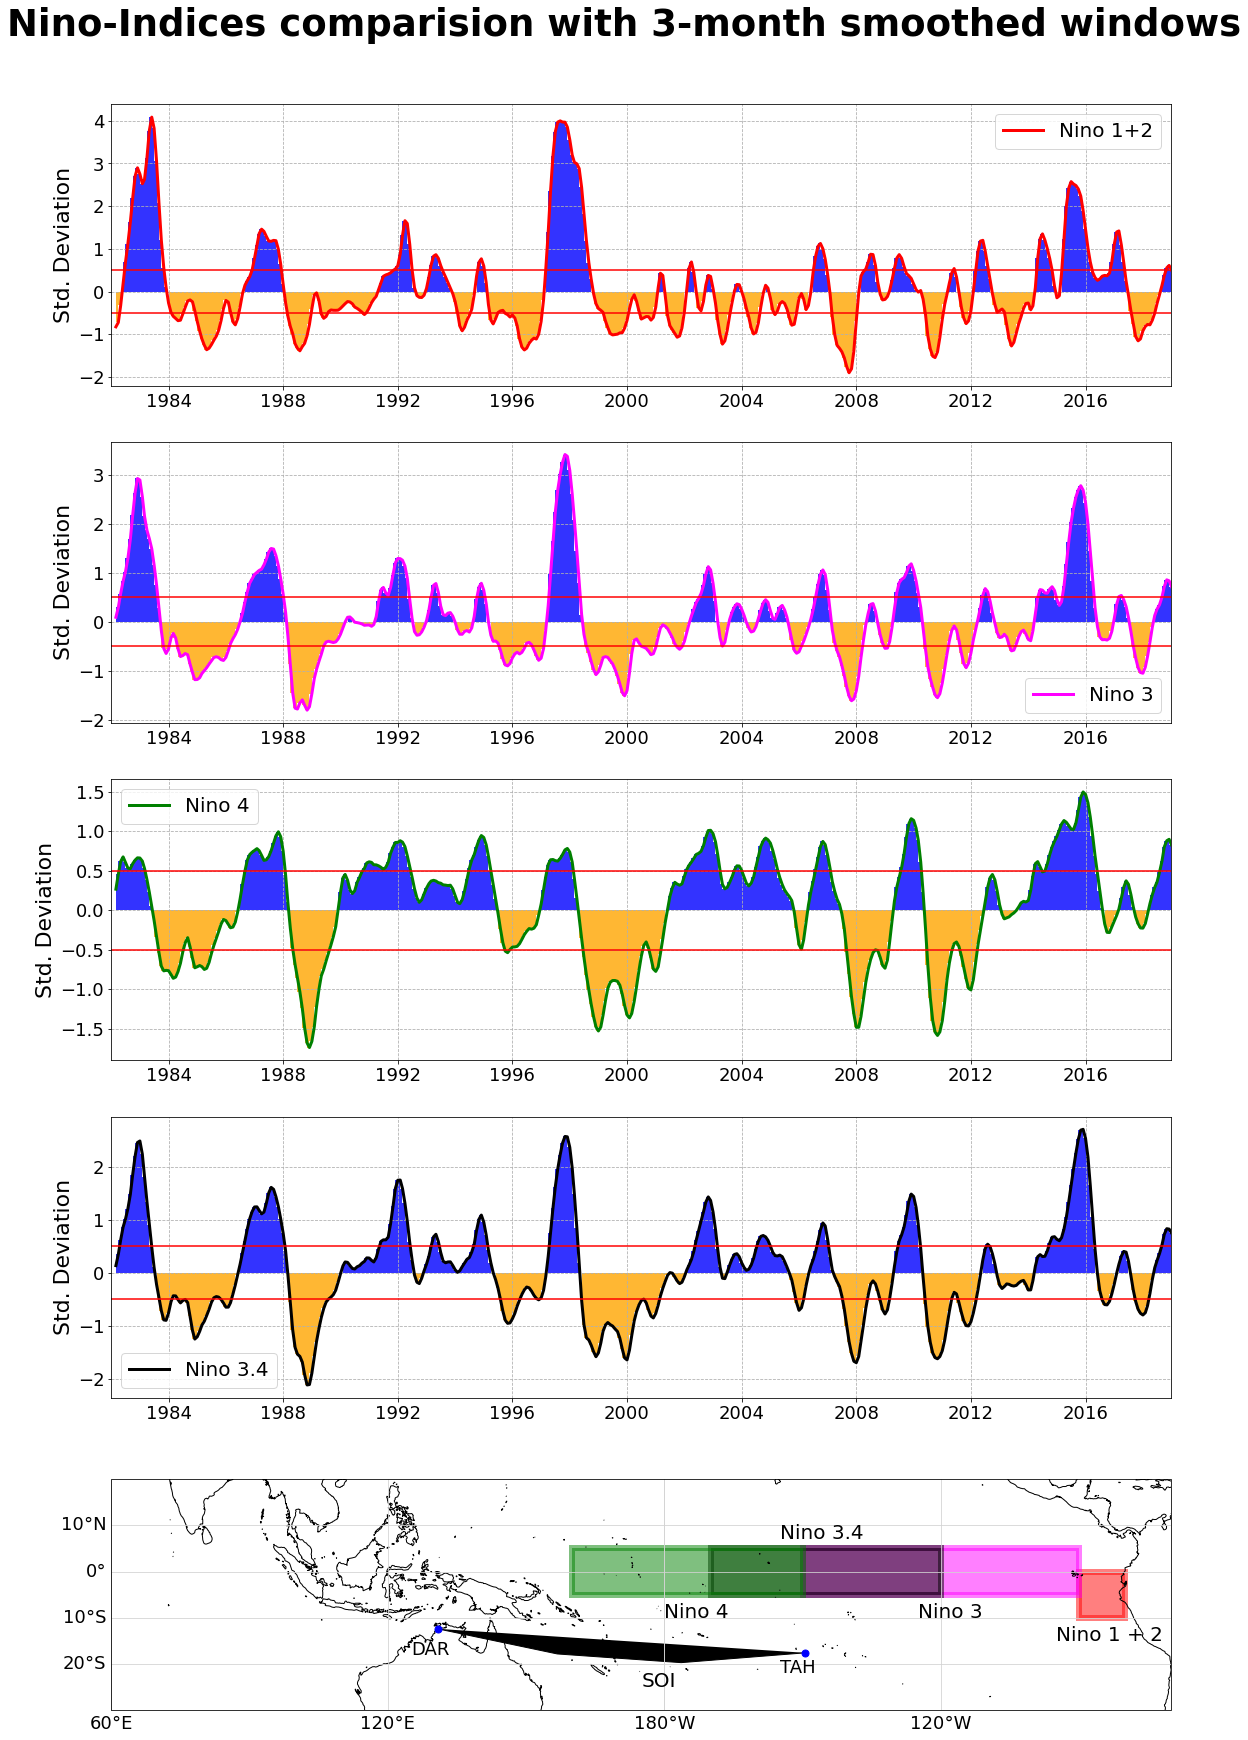

In [139]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patches as mpatches
import matplotlib.path as mpath

Path = mpath.Path

plt.figure(figsize=[19,30])
plt.suptitle('Nino-Indices comparision with 3-month smoothed windows', fontsize=37, fontweight='bold', y = 0.925)


# plt1: 
plt.subplot(5,1,1)
plt.plot(time,nino12, 'r', linewidth = 3);
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(['Nino 1+2'], loc="best", fontsize = 20)
plt.grid(linestyle='--')
plt.ylabel('Std. Deviation', fontsize = 22)
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = -0.5, color = 'r', linestyle = '-')
plt.fill_between(time,nino12, where = nino12 < 0, step="pre", facecolor = 'orange', alpha=0.8)
plt.fill_between(time,nino12, where = nino12 > 0, step="pre", facecolor = 'blue', alpha=0.8)
plt.xlim(['1982-01-01','2018-12-31'])



# plt2: 
plt.subplot(5,1,2)
plt.plot(time,nino3, 'magenta', linewidth = 3);
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(['Nino 3'], loc="best", fontsize = 20)
plt.grid(linestyle='--')
plt.ylabel('Std. Deviation', fontsize = 22)
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = -0.5, color = 'r', linestyle = '-')
plt.fill_between(time,nino3, where = nino3 < 0, step="pre", facecolor = 'orange', alpha=0.8)
plt.fill_between(time,nino3, where = nino3 > 0, step="pre", facecolor = 'blue', alpha=0.8)
plt.xlim(['1982-01-01','2018-12-31'])



# plt3: 
plt.subplot(5,1,3)
plt.plot(time,nino4, 'g', linewidth = 3);
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(['Nino 4'], loc="best", fontsize = 20)
plt.grid(linestyle='--')
plt.ylabel('Std. Deviation', fontsize = 22)
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = -0.5, color = 'r', linestyle = '-')
plt.fill_between(time,nino4, where = nino4 < 0, step="pre", facecolor = 'orange', alpha=0.8)
plt.fill_between(time,nino4, where = nino4 > 0, step="pre", facecolor = 'blue', alpha=0.8)
plt.xlim(['1982-01-01','2018-12-31'])


# plt4: 
plt.subplot(5,1,4)
plt.plot(time,nino34, 'k', linewidth = 3);
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(['Nino 3.4'], loc="best", fontsize = 20)
plt.grid(linestyle='--')
plt.ylabel('Std. Deviation', fontsize = 22)
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = -0.5, color = 'r', linestyle = '-')
plt.fill_between(time,nino34, where = nino34 < 0, step="pre", facecolor = 'orange', alpha=0.8)
plt.fill_between(time,nino34, where = nino34 > 0, step="pre", facecolor = 'blue', alpha=0.8)
plt.xlim(['1982-01-01','2018-12-31'])


# plt5: 
ax1 = plt.subplot(5,1,5,projection=ccrs.PlateCarree(central_longitude=180))
ax1.set_extent([-120, 110, 20, -30], crs=ccrs.PlateCarree(central_longitude=180))
ax1.coastlines(resolution='auto', color='k')
# mark a known place to help us geo-locate ourselves
ax1.plot(-149.4499, -17.63, 'bo', markersize=7, transform=ccrs.Geodetic())
ax1.text(-155, -22, 'TAH', transform=ccrs.Geodetic(), fontsize=18)
ax1.plot(130.844441, -12.438056, 'bo', markersize=7, transform=ccrs.Geodetic())
ax1.text(125, -18, 'DAR', transform=ccrs.Geodetic(), fontsize=18)
ax1.text(175, -25, 'SOI', transform=ccrs.Geodetic(), fontsize=20)
ax1.add_patch(mpatches.PathPatch(Path([(-149.4499, -17.639), (130.844441, -12.438056)], [Path.MOVETO,Path.LINETO]),facecolor='k', transform=ccrs.Geodetic()))
ax1.add_patch(mpatches.Rectangle(xy=[-90, -10], width=10, height=10, facecolor='r',edgecolor='r',lw=6, alpha=0.5, transform=ccrs.PlateCarree()))
ax1.text(-95, -15, 'Nino 1 + 2', transform=ccrs.Geodetic(), fontsize=20)
ax1.add_patch(mpatches.Rectangle(xy=[-150, -5], width=60, height=10, facecolor='magenta',edgecolor='magenta', lw=6, alpha=0.5, transform=ccrs.PlateCarree()))
ax1.text(-125, -10, 'Nino 3', transform=ccrs.Geodetic(), fontsize=20)
ax1.add_patch(mpatches.Rectangle(xy=[-170, -5], width=50, height=10, facecolor='k',edgecolor='k', lw=6 ,alpha=0.5, transform=ccrs.PlateCarree()))
ax1.text(-155, 7, 'Nino 3.4', transform=ccrs.Geodetic(), fontsize=20)
ax1.add_patch(mpatches.Rectangle(xy=[160, -5], width=50, height=10, facecolor='g',edgecolor='g', lw=6, alpha=0.5, transform=ccrs.PlateCarree()))
ax1.text(180, -10, 'Nino 4', transform=ccrs.Geodetic(), fontsize=20)
g1 = ax1.gridlines(color='lightgrey', linestyle='-', draw_labels=True)
g1.xlabels_top = False
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabel_style = {'size': 18, 'color': 'k'}
g1.ylabel_style = {'size': 18, 'color': 'k'}



For these simple examples, we are going to work with the good old temperature dataset again:

In [23]:
ds = xr.open_dataset('C:/Users/david/OneDrive - uibk.ac.at/MA/VU Physik des Klimasystems/LectureNotebooks/Group Project/ERA_dataERA5_LowRes_Monthly_t2m.nc')
ds
 

<xarray.Dataset>
Dimensions:    (longitude: 480, latitude: 241, time: 480)
Coordinates:
  * longitude  (longitude) float32 -179.6 -178.9 -178.1 ... 178.1 178.9 179.6
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-01-15 17:17:48 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

With this simple example we seek to reproduce the one-point correlation map with SLP at Darwin, that we showed during the lecture:

<img src="https://www.dropbox.com/s/b1njlzdwn5vr5zs/darwin_thaiti.png?dl=1" width="60%">

In [45]:
# new data file, available on OLAT or on the scratch directory
ds = xr.open_dataset('C:/Users/david/OneDrive - uibk.ac.at/MA/VU Physik des Klimasystems/LectureNotebooks/Group Project/ERA_dataERA5_LowRes_Monthly_uvslp.nc')

In [46]:
# compute the annual average
slp = ds.msl.load().resample(time='AS').mean(dim='time') / 100.
# take the SLP at Darwin
slp_da = slp.sel(latitude=-12.45, longitude=130, method='nearest')

In [47]:
# make an empty array that we will fill
cor_map = slp.isel(time=0) * 0.
# loop over lats and lons
for j in np.arange(len(ds.latitude)):
    for i in np.arange(len(ds.longitude)):
        # we use the .values attribute because this is much faster
        cor_map.values[j, i] = np.corrcoef(slp.values[:, j, i], slp_da.values)[0, 1]

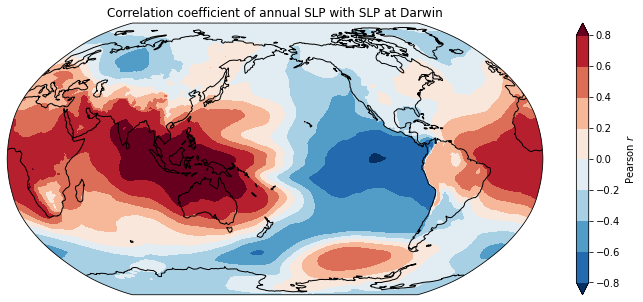

In [48]:
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-180))
cor_map.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), levels=np.linspace(-0.8, 0.8, 9), 
                      extend='both', cbar_kwargs={'label':'Pearson $r$'});
ax.coastlines(); ax.set_global();
plt.title('Correlation coefficient of annual SLP with SLP at Darwin');